# Image generation (plus some gold mining)

In [1]:
import sys, os
sys.path.append('../')

import logging
import numpy as np
import matplotlib.pyplot as plt

from units import *
from simulation import SubhaloSimulator

logging.basicConfig(format='%(message)s', level=logging.INFO)

## Prior

In [2]:
alpha_mean = 2e8/M_s
alpha_std = 0.2e8/M_s

beta_mean = -1.9
beta_std = 0.05

## Draw parameters to generate

In [3]:
n_sims = 1000
n_theta_samples = 100

In [4]:
alpha = np.random.normal(loc=alpha_mean, scale=alpha_std, size=n_sims)
beta = np.random.normal(loc=beta_mean, scale=beta_std, size=n_sims)
parameters = np.vstack((alpha, beta)).T

assert np.min(alpha) > 0.
assert np.max(beta) < -1.

## Generate data

In [5]:
sim = SubhaloSimulator()

# images = sim.rvs(alpha, beta, n_sims)

#images, t_xz, log_r_xz, latents = sim.rvs_score_ratio(alpha, beta, alpha_mean, beta_mean, n_sims)

images, t_xz, log_r_xz, log_r_xz_uncertainties, latents = sim.rvs_score_ratio_to_evidence(
    alpha,
    beta,
    alpha_mean,
    alpha_std,
    beta_mean,
    beta_std,
    n_sims,
    n_theta_samples,
)

n_subs = np.array([v[0] for v in latents])


Simulating image 50 / 1000
Simulating image 100 / 1000
Simulating image 150 / 1000
Simulating image 200 / 1000
Simulating image 250 / 1000
Simulating image 300 / 1000
Simulating image 350 / 1000
Simulating image 400 / 1000
Simulating image 450 / 1000
Simulating image 500 / 1000
Simulating image 550 / 1000
Simulating image 600 / 1000
Simulating image 650 / 1000
Simulating image 700 / 1000
Simulating image 750 / 1000
Simulating image 800 / 1000
Simulating image 850 / 1000
Simulating image 900 / 1000
Simulating image 950 / 1000
Simulating image 1000 / 1000


In [6]:
if not os.path.exists("./data"):
    os.mkdir("./data")

np.save("data/theta.npy", parameters)
np.save("data/x.npy", images)
np.save("data/t_xz.npy", t_xz)
np.save("data/log_r_xz.npy", log_r_xz)
np.save("data/log_r_xz_uncertainties.npy", log_r_xz_uncertainties)

## A first look at the data

In [15]:
np.mean(t_xz, axis=0)

array([ 2.00520311e+54, -4.05531674e+02])

In [16]:
np.mean(np.exp(-log_r_xz))

0.2890859150195156

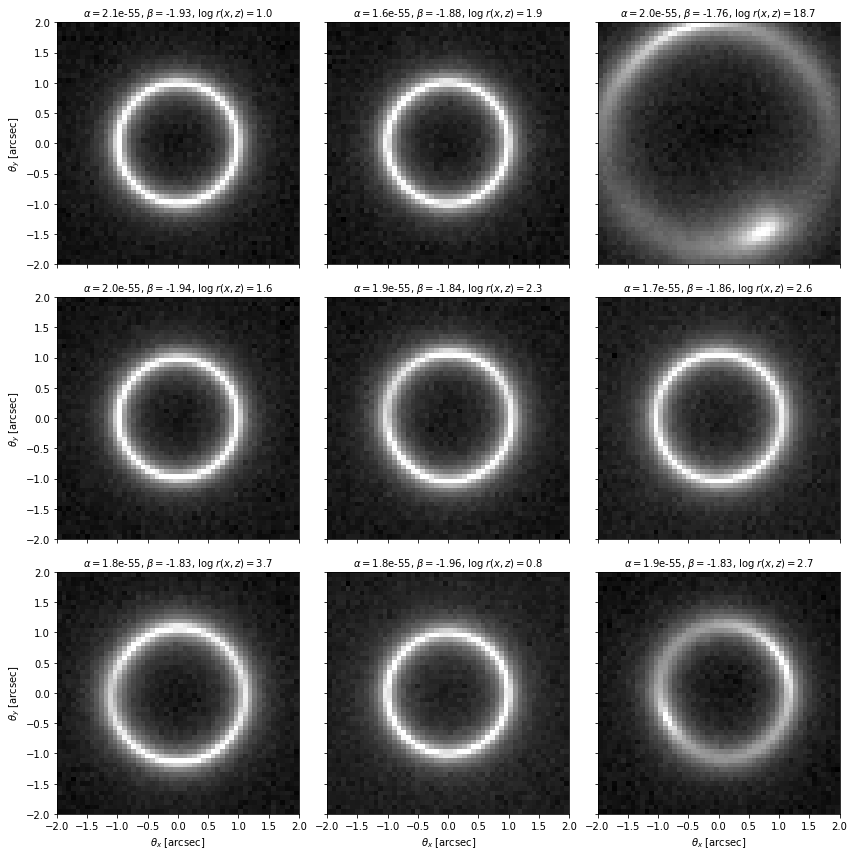

In [7]:
plt.figure(figsize=(12,12))

for i in [6,7,8,0,3,1,2,4,5]:
    if i == 6:
        ax_y = plt.subplot(3,3,i+1)
        ax_x = ax_y
    elif i in [7,8]:
        ax_x = plt.subplot(3,3,i+1, sharey=ax_y)
    elif i in [0,3]:
        ax_y = plt.subplot(3,3,i+1, sharex=ax_x)
    else:
        ax = plt.subplot(3,3,i+1, sharey=ax_y, sharex=ax_x)
        
    plt.imshow(np.log10(images[i]), vmax=3.5, cmap='gist_gray', extent=(-2.,2.,-2.,2.), origin="lower")
    description = r"$\alpha = ${:.1e}, $\beta = ${:.2f}, $\log \; r(x,z) = ${:.1f}".format(
            alpha[i],
            beta[i],
            log_r_xz[i]
        )
    plt.title(
        description,
        fontsize=10
    )
    
    if i in [6,7,8]:
        plt.xlabel(r"$\theta_x$ [arcsec]")
    else:
        plt.setp(plt.gca().get_xticklabels(), visible=False)
        
    if i in [0,3,6]:
        plt.ylabel(r"$\theta_y$ [arcsec]")
    else:
        plt.setp(plt.gca().get_yticklabels(), visible=False)
    
plt.tight_layout()
plt.show()

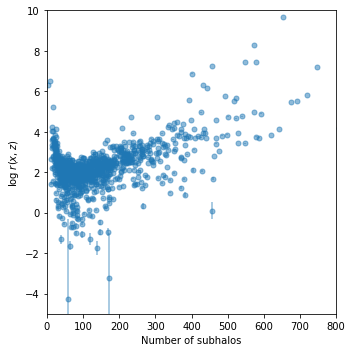

In [12]:
plt.figure(figsize=(5,5))

plt.errorbar(n_subs, log_r_xz, yerr=1.*log_r_xz_uncertainties, ls=" ", marker="o", ms=5., alpha=0.5)

plt.xlim(0,800)
plt.ylim(-5.,10.)
plt.xlabel("Number of subhalos")
plt.ylabel(r"$\log \; r(x,z)$")

plt.tight_layout()
plt.show()